In [2]:
from cortexlib.utils.plotting import plot_fev_vs_metric_scatter
from cortexlib.utils.plotting import simclr_colours, vgg19_colours
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../../analysis/mouse_m01_d2/results/simclr_neural_pc1_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/simclr_neural_pc1_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/simclr_neural_pc1_m03_d4.json"),
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,3.604,3.604,0.152,NaN,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,3.604,3.604,0.172,-0.099,-0.118
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,3.604,3.604,0.169,-0.094,-0.118
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,3.604,3.604,0.167,-0.087,-0.119
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,3.604,3.604,0.166,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural_pc1,m02_d3,fc,200.0,0.510,0.555,1.615,1.615,0.128,0.107,NaN
96,simclr_neural_pc1,m02_d3,fc,300.0,0.512,0.557,1.615,1.615,0.129,0.105,NaN
97,simclr_neural_pc1,m02_d3,fc,400.0,0.514,0.560,1.615,1.615,0.129,0.110,NaN
98,simclr_neural_pc1,m02_d3,fc,500.0,0.512,0.558,1.615,1.615,0.129,0.084,NaN


In [3]:
# Filter to only rows where n_pcs is 100 - standardise
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,3.604,3.604,0.166,-0.091,-0.120
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,2.465,2.465,0.202,-0.056,-0.136
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,2.099,2.099,0.169,0.000,-0.106
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,2.352,2.352,0.125,0.252,-0.118
24,simclr_neural_pc1,m01_d2,fc,100.0,0.477,0.503,1.651,1.651,0.188,0.108,-0.065
33,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,2.201,2.201,0.107,0.447,-0.112
38,simclr_neural_pc1,m01_d2,layer1,100.0,0.425,0.450,0.517,0.517,0.168,-0.114,-0.097
47,simclr_neural_pc1,m01_d2,layer2,100.0,0.485,0.513,0.738,0.738,0.151,-0.080,-0.076
56,simclr_neural_pc1,m01_d2,layer3,100.0,0.490,0.517,0.953,0.953,0.182,-0.005,-0.081
65,simclr_neural_pc1,m01_d2,layer4,100.0,0.470,0.496,1.123,1.123,0.143,0.085,-0.071


In [4]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.628667,1.628667,0.137667,0.108,-0.057667
1,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,0.515667,0.515667,0.129000,-0.114,-0.105333
2,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,0.740667,0.740667,0.122333,-0.080,-0.086000
3,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,0.956667,0.956667,0.141000,-0.005,-0.080333
4,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.127667,1.127667,0.106667,0.085,-0.073333
5,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,3.608667,3.608667,0.116667,-0.091,-0.124667
6,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,2.459000,2.459000,0.139000,-0.056,-0.130000
7,vgg19_neural_pc1,conv4_4,100.0,0.352333,0.377667,2.140667,2.140667,0.114000,0.000,-0.112000
8,vgg19_neural_pc1,conv5_4,100.0,0.271000,0.291000,2.393667,2.393667,0.079333,0.252,-0.118667
9,vgg19_neural_pc1,fc2,100.0,0.256667,0.276667,4.584667,4.584667,0.069667,0.447,-0.107333


In [5]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# RSA: Compute SEM and merge
alpha_sem_df = df_pcs.groupby('layer')['alpha'].sem().reset_index()
alpha_sem_df.columns = ['layer', 'sem_alpha']
avg_metrics = avg_metrics.merge(alpha_sem_df, on='layer', how='left')

# FEV: Compute SEM and merge
fev_sem_df = df_pcs.groupby('layer')['mean_fev'].sem().reset_index()
fev_sem_df.columns = ['layer', 'sem_mean_fev']
avg_metrics = avg_metrics.merge(fev_sem_df, on='layer', how='left')

MAX_SEM = 0.005  # or test 0.025, 0.02
# avg_metrics['sem_mean_fev_plot'] = avg_metrics['sem_mean_fev'].clip(upper=MAX_SEM)
# avg_metrics['sem_alpha_plot'] = avg_metrics['sem_alpha'].clip(upper=MAX_SEM)
avg_metrics['sem_mean_fev_plot'] = avg_metrics['sem_mean_fev']
avg_metrics['sem_alpha_plot'] = avg_metrics['sem_alpha']

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer,model,sem_alpha,sem_mean_fev,sem_mean_fev_plot,sem_alpha_plot
0,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.628667,1.628667,0.137667,0.108,-0.057667,simclr,0.011260,0.029816,0.029816,0.011260
1,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,0.515667,0.515667,0.129000,-0.114,-0.105333,simclr,0.000667,0.023288,0.023288,0.000667
2,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,0.740667,0.740667,0.122333,-0.080,-0.086000,simclr,0.001453,0.018260,0.018260,0.001453
3,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,0.956667,0.956667,0.141000,-0.005,-0.080333,simclr,0.001856,0.039509,0.039509,0.001856
4,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.127667,1.127667,0.106667,0.085,-0.073333,simclr,0.002404,0.041954,0.041954,0.002404
5,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,3.608667,3.608667,0.116667,-0.091,-0.124667,vgg19,0.006766,0.044333,0.044333,0.006766
6,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,2.459000,2.459000,0.139000,-0.056,-0.130000,vgg19,0.003055,0.046225,0.046225,0.003055
7,vgg19_neural_pc1,conv4_4,100.0,0.352333,0.377667,2.140667,2.140667,0.114000,0.000,-0.112000,vgg19,0.054112,0.044427,0.044427,0.054112
8,vgg19_neural_pc1,conv5_4,100.0,0.271000,0.291000,2.393667,2.393667,0.079333,0.252,-0.118667,vgg19,0.079285,0.022942,0.022942,0.079285
9,vgg19_neural_pc1,fc2,100.0,0.256667,0.276667,4.584667,4.584667,0.069667,0.447,-0.107333,vgg19,2.357216,0.032951,0.032951,2.357216


In [6]:
for model_name, group in avg_metrics.groupby('model'):
    r, p = spearmanr(group['alpha'], group['mean_fev'])
    print(f"{model_name}: Spearman r = {r:.3f}, p = {p:.3f}")

simclr: Spearman r = 0.100, p = 0.873
vgg19: Spearman r = -0.100, p = 0.873


/var/folders/_c/21m3vmjd7c1_75f4nxmg1k480000gn/T/ipykernel_72398/1809805720.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


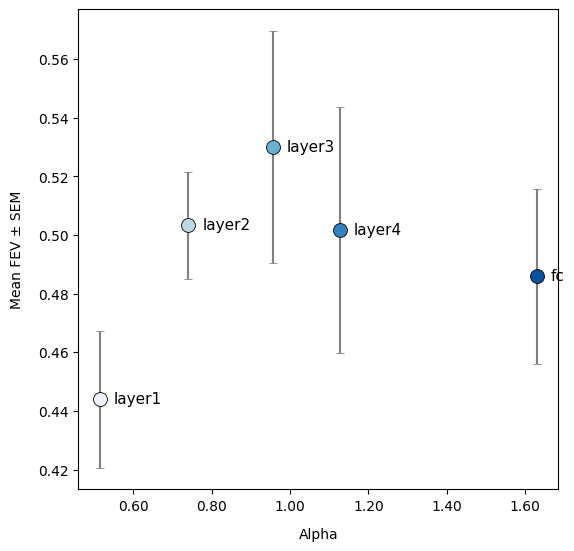

In [7]:
df_simclr = avg_metrics[avg_metrics["model"] == "simclr"]
fig = plot_fev_vs_metric_scatter(df_simclr, simclr_colours, "alpha", "Alpha")
fig.savefig("../bar/figures/fev_vs_alpha_simclr_neural_pc1.svg", format='svg', bbox_inches='tight', dpi=300)
fig.show()

/var/folders/_c/21m3vmjd7c1_75f4nxmg1k480000gn/T/ipykernel_72398/3613466518.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


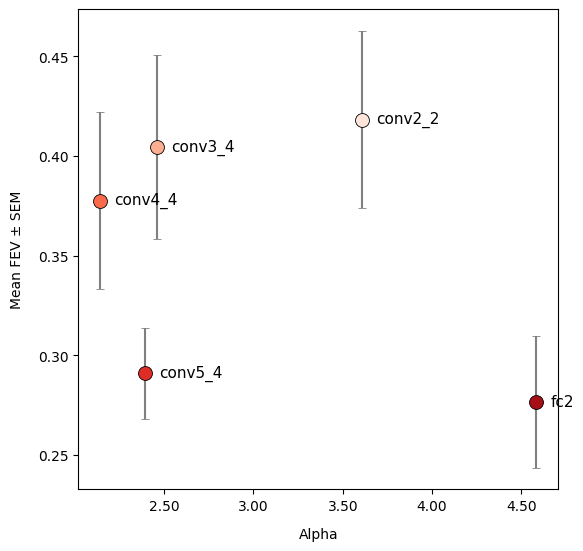

In [8]:
df_vgg19 = avg_metrics[avg_metrics["model"] == "vgg19"]
fig = plot_fev_vs_metric_scatter(df_vgg19, vgg19_colours, "alpha", "Alpha")
fig.savefig("../bar/figures/fev_vs_alpha_vgg19_neural_pc1.svg", format='svg', bbox_inches='tight', dpi=300)
fig.show()